In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

In [2]:
df = pd.read_excel("insurance (2) 1.xlsx")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df.duplicated().sum()

1

In [9]:
df.duplicated().sum()

1

In [10]:
df [df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [11]:
for col in df.columns:
    dup_count = df[col].duplicated().sum()
    if dup_count > 0:
        print(f"{col} has {dup_count} duplicate values")

age has 1291 duplicate values
sex has 1336 duplicate values
bmi has 790 duplicate values
children has 1332 duplicate values
smoker has 1336 duplicate values
region has 1334 duplicate values
charges has 1 duplicate values


In [12]:
df.shape

(1338, 7)

In [13]:
print("1338:")
print("7:")

1338:
7:


In [14]:
for col in df.columns:
    print(col, df[col].nunique())

age 47
sex 2
bmi 548
children 6
smoker 2
region 4
charges 1337


In [15]:
df.duplicated().sum()

1

In [16]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [17]:
df = df.drop_duplicates()

In [18]:
df.duplicated().sum()

0

In [19]:
def discrete_univariate_analysis(discrete_data):
    for col_name in discrete_data:
        print("*"*10, col_name, "*"*10)
        print(discrete_data[col_name].agg(['count', 'nunique', 'unique']))
        print('Value Counts: \n', discrete_data[col_name].value_counts())
        print()
        

In [20]:
def numerical_univariate_analysis(numerical_data):
    for col_name in numerical_data:
        print("*"*10, col_name, "*"*10)
        print(numerical_data[col_name].agg(['count', 'min', 'max', 'mean', 'median', 'std', 'skew']))
        print()

In [21]:
discrete_df = df.select_dtypes(include=['object'])

numerical_df = df.select_dtypes(include=['float64', 'int64'])

In [22]:
discrete_univariate_analysis(discrete_df)

********** sex **********
count                1337
nunique                 2
unique     [female, male]
Name: sex, dtype: object
Value Counts: 
 sex
male      675
female    662
Name: count, dtype: int64

********** smoker **********
count           1337
nunique            2
unique     [yes, no]
Name: smoker, dtype: object
Value Counts: 
 smoker
no     1063
yes     274
Name: count, dtype: int64

********** region **********
count                                              1337
nunique                                               4
unique     [southwest, southeast, northwest, northeast]
Name: region, dtype: object
Value Counts: 
 region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64



In [23]:
numerical_univariate_analysis(numerical_df)

********** age **********
count     1337.000000
min         18.000000
max         64.000000
mean        39.222139
median      39.000000
std         14.044333
skew         0.054781
Name: age, dtype: float64

********** bmi **********
count     1337.000000
min         15.960000
max         53.130000
mean        30.663452
median      30.400000
std          6.100468
skew         0.283914
Name: bmi, dtype: float64

********** children **********
count     1337.000000
min          0.000000
max          5.000000
mean         1.095737
median       1.000000
std          1.205571
skew         0.937421
Name: children, dtype: float64

********** charges **********
count      1337.000000
min        1121.873900
max       63770.428010
mean      13279.121487
median     9386.161300
std       12110.359656
skew          1.515391
Name: charges, dtype: float64



In [24]:
# num vs num

numerical_df.corr()

,age,bmi,children,charges
age,1.000000,0.109344,0.041536,0.298308
bmi,0.109344,1.000000,0.012755,0.198401
children,0.041536,0.012755,1.000000,0.067389
charges,0.298308,0.198401,0.067389,1.000000


In [25]:
# cat vs cat

pd.crosstab(discrete_df['sex'], discrete_df['smoker'], normalize='index')

smoker,no,yes
sex,,
female,0.826284,0.173716
male,0.764444,0.235556


# Univariate Data Analysis

In [27]:
num_cols = ['age', 'bmi', 'children', 'charges']
cat_cols = ['sex', 'smoker', 'region']

In [28]:
df[num_cols].describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


<Axes: xlabel='charges', ylabel='Count'>

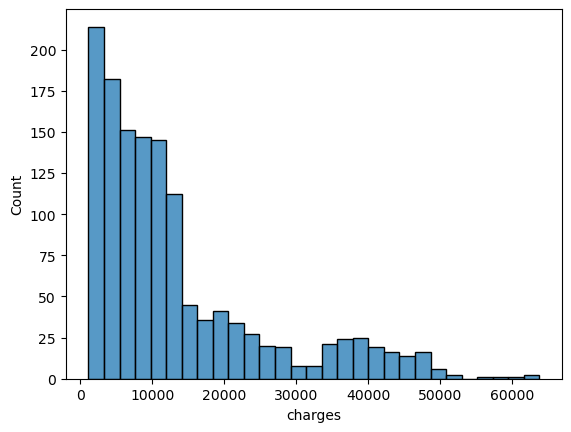

In [29]:
sns.histplot(data=df, x="charges")

<Axes: xlabel='age', ylabel='Count'>

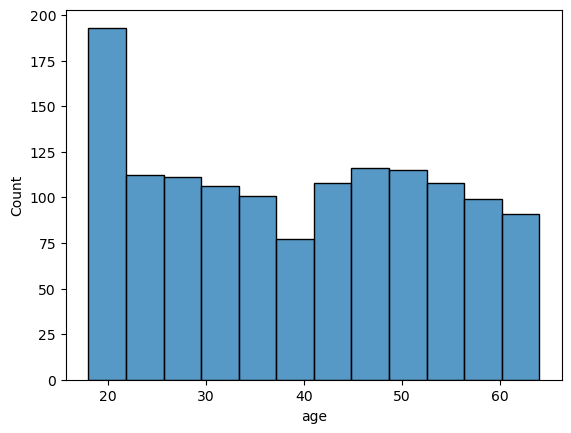

In [30]:
sns.histplot(data=df, x="age")

<Axes: xlabel='bmi', ylabel='Count'>

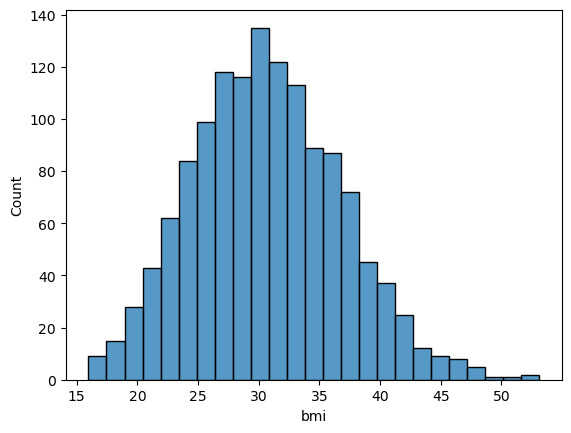

In [31]:
sns.histplot(data=df, x="bmi")

<Axes: xlabel='sex', ylabel='count'>

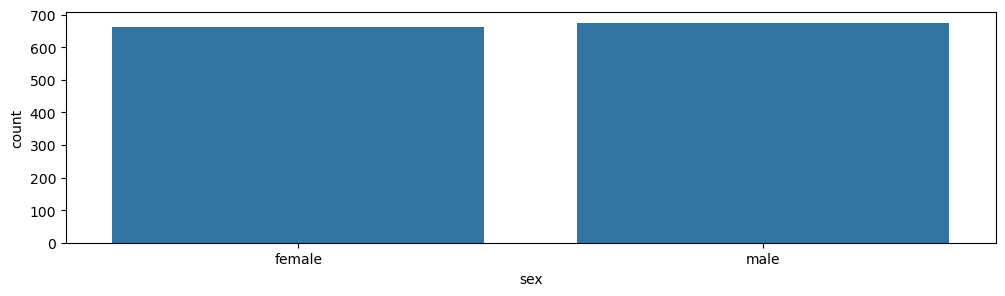

In [32]:
plt.figure(figsize=(12,3))
sns.countplot(data=df, x="sex")

<Axes: xlabel='charges', ylabel='Density'>

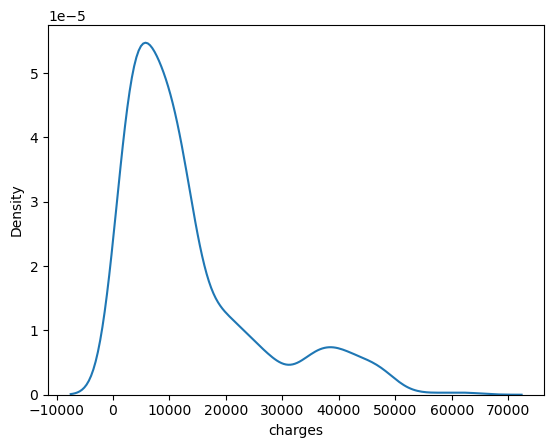

In [33]:
sns.kdeplot(data=df, x="charges")

<Axes: xlabel='charges', ylabel='Proportion'>

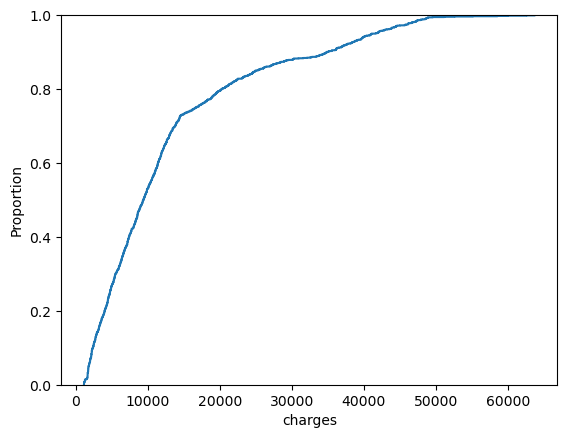

In [34]:
sns.ecdfplot(data=df, x="charges")

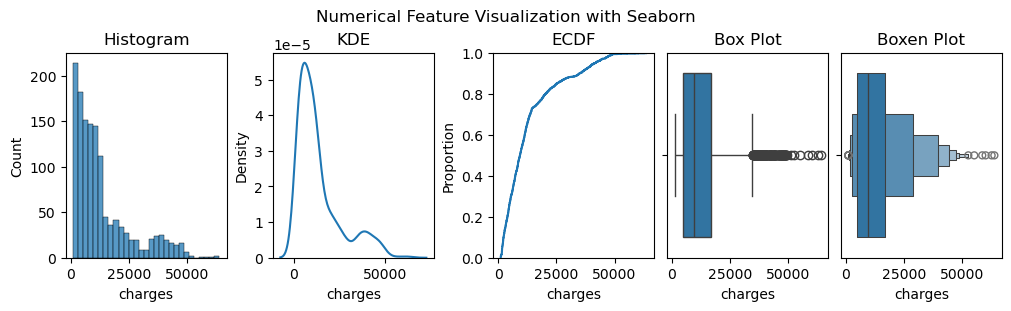

In [35]:
fig, axs = plt.subplots(1, 5, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Numerical Feature Visualization with Seaborn")

axs[0].set_title("Histogram")
sns.histplot(data=df, x='charges', ax=axs[0])

axs[1].set_title("KDE")
sns.kdeplot(data=df, x='charges', ax=axs[1])

axs[2].set_title("ECDF")
sns.ecdfplot(data=df, x='charges', ax=axs[2])

axs[3].set_title("Box Plot")
sns.boxplot(data=df, x='charges', ax=axs[3])

axs[4].set_title("Boxen Plot")
sns.boxenplot(data=df, x='charges', ax=axs[4])

plt.show()

# Univariate Analysis Count plot

<Axes: xlabel='smoker', ylabel='count'>

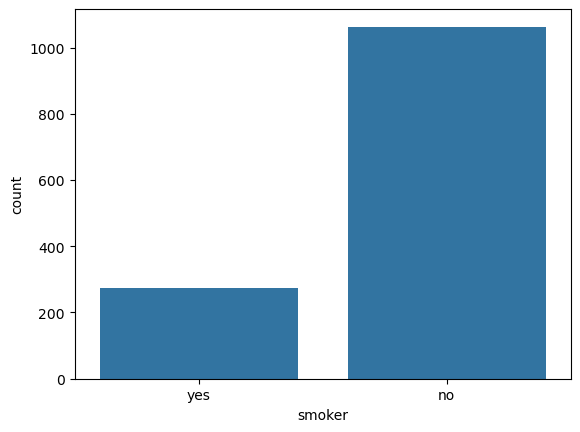

In [36]:
sns.countplot(data=df, x='smoker')

<Axes: xlabel='sex', ylabel='count'>

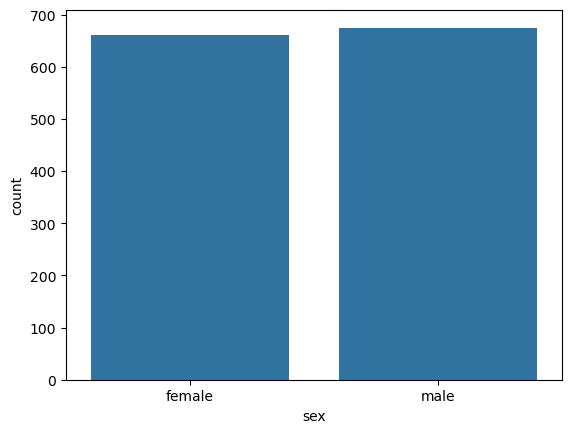

In [37]:
sns.countplot(data=df, x='sex')

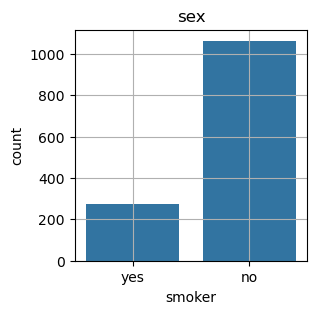

In [38]:
fig, ax = plt.subplots(figsize=(3,3))

ax.set_title("sex")
sns.countplot(data=df, x='smoker', ax=ax)

plt.grid(True)

plt.show()

# Bivariate numerical v/s numerical column

<Axes: xlabel='bmi', ylabel='charges'>

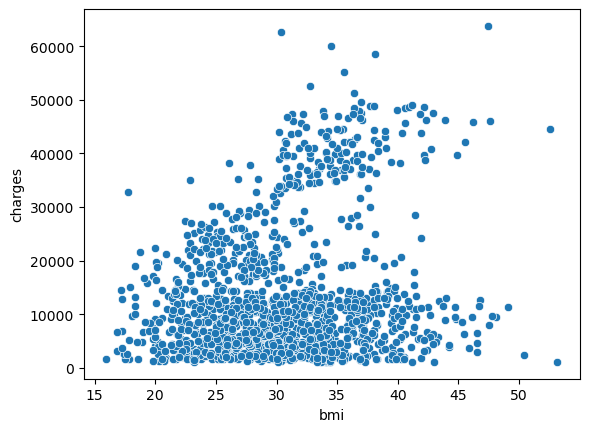

In [39]:
sns.scatterplot(data=df, x='bmi', y='charges')

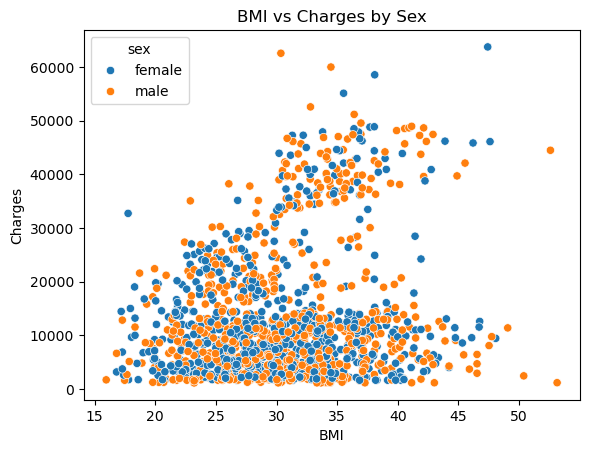

In [40]:
plt.figure()
sns.scatterplot(
    x='bmi',
    y='charges',
    hue='sex',
    data=df
)
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges by Sex')
plt.show()

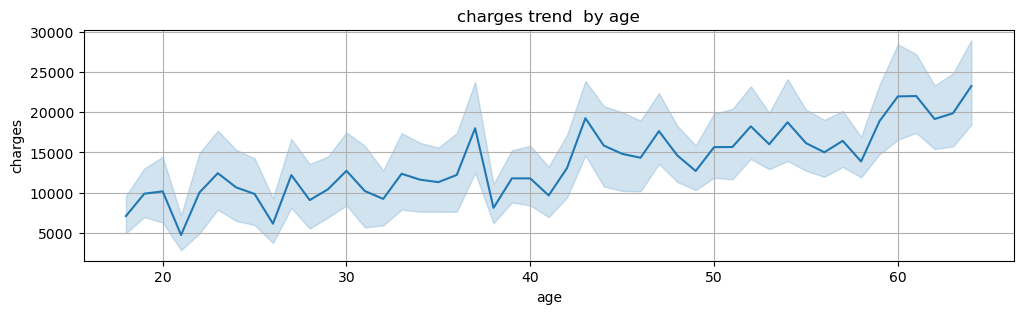

In [41]:
fig, ax = plt.subplots(figsize=(12,3))

ax.set_title("charges trend  by age")
sns.lineplot(data=df, x='age', y='charges', ax=ax)

plt.grid(True)

plt.show()

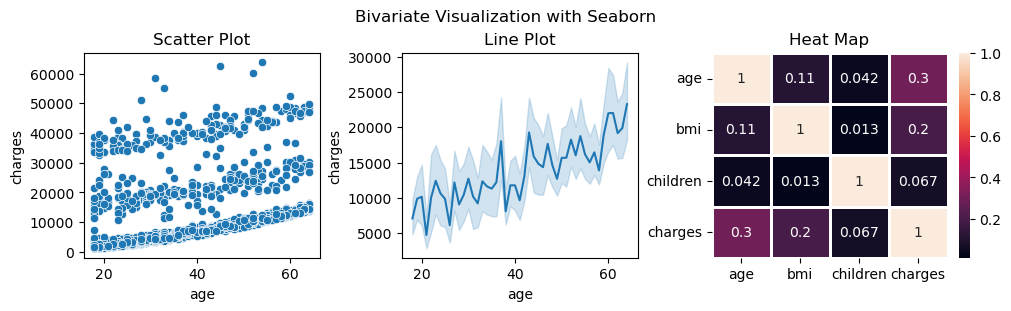

In [42]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), constrained_layout=True)
fig.suptitle("Bivariate Visualization with Seaborn")

axs[0].set_title("Scatter Plot")
sns.scatterplot(data=df, x='age', y='charges', ax=axs[0])

axs[1].set_title("Line Plot")
sns.lineplot(data=df, x='age', y='charges', ax=axs[1])
axs[1].annotate("What ?", xytext=(10, 6), color="red", 
                xy=(7, 3.2), arrowprops={"arrowstyle":"->", "connectionstyle":"arc3, rad=0.3"})

axs[2].set_title("Heat Map")
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, linewidths=0.8, ax=axs[2])

plt.show()

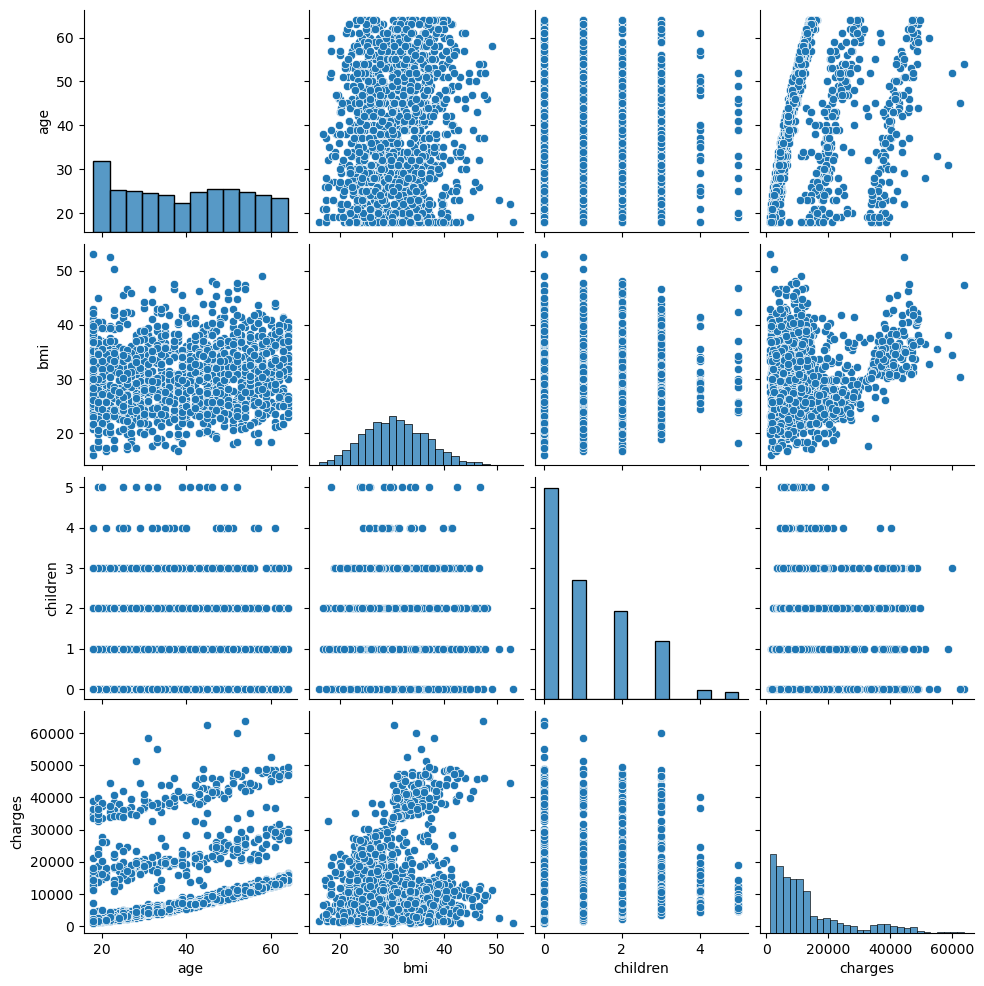

In [43]:
sns.pairplot(df)

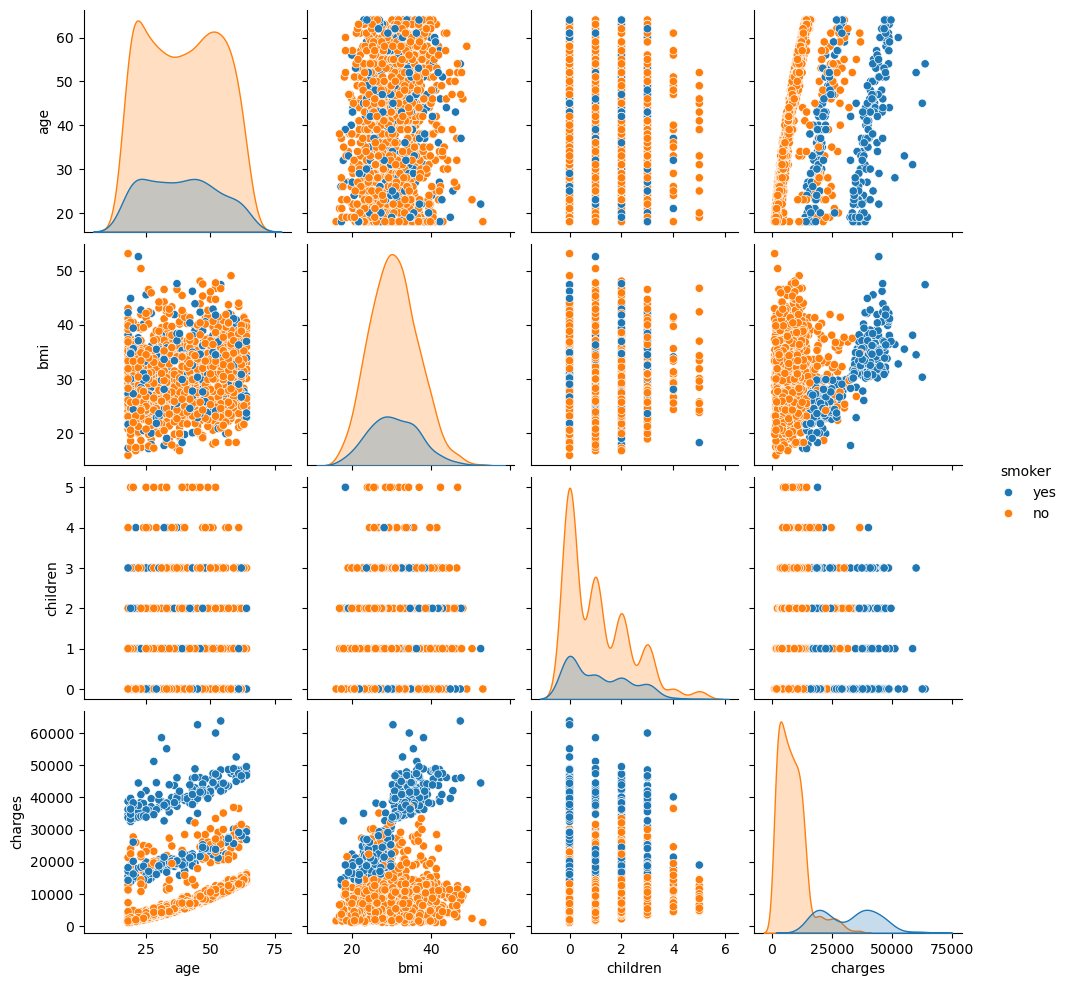

In [44]:
sns.pairplot(df, hue="smoker")

# Bivariate Plotting for Numerical v/s Categorical

<Axes: xlabel='smoker', ylabel='charges'>

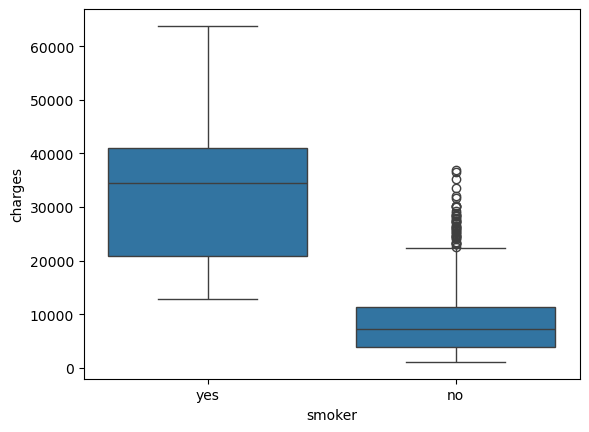

In [45]:

import seaborn as sns
sns.boxplot(data=df, x='smoker', y='charges')

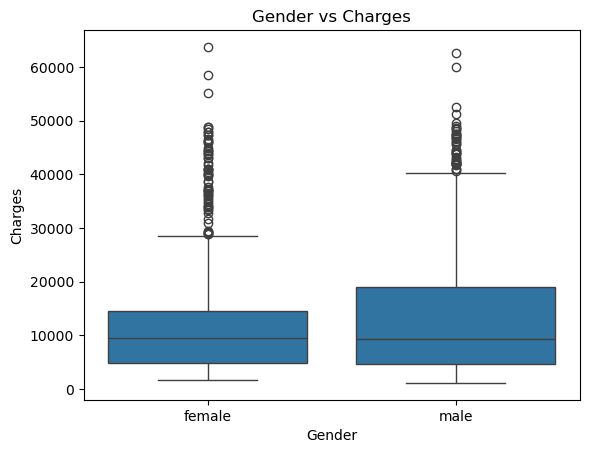

In [46]:
plt.figure()
sns.boxplot(x='sex', y='charges', data=df)
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.title('Gender vs Charges')
plt.show()

<Axes: xlabel='region', ylabel='charges'>

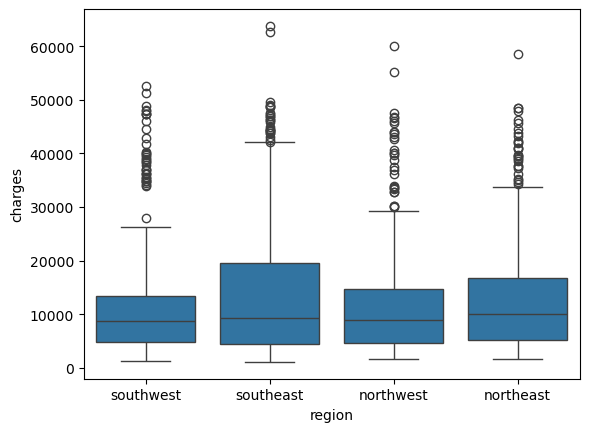

In [47]:

import seaborn as sns
sns.boxplot(data=df, x='region', y='charges')

<Axes: xlabel='sex', ylabel='charges'>

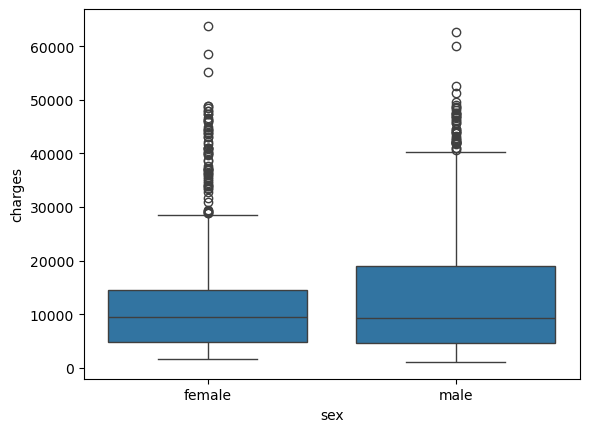

In [48]:

import seaborn as sns
sns.boxplot(data=df, x='sex', y='charges')

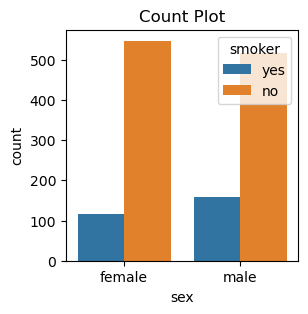

In [49]:
fig, ax = plt.subplots(figsize=(3,3))


ax.set_title("Count Plot")
sns.countplot(data=df, x='sex', hue='smoker', ax=ax)

plt.show()

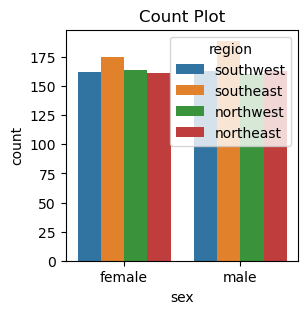

In [50]:
fig, ax = plt.subplots(figsize=(3,3))


ax.set_title("Count Plot")
sns.countplot(data=df, x='sex', hue='region', ax=ax)

plt.show()

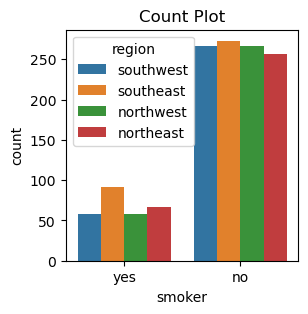

In [51]:
fig, ax = plt.subplots(figsize=(3,3))


ax.set_title("Count Plot")
sns.countplot(data=df, x='smoker', hue='region', ax=ax)

plt.show()